### Lesson: Writing Good Code

In [ ]:
#Lecture about good coding practice

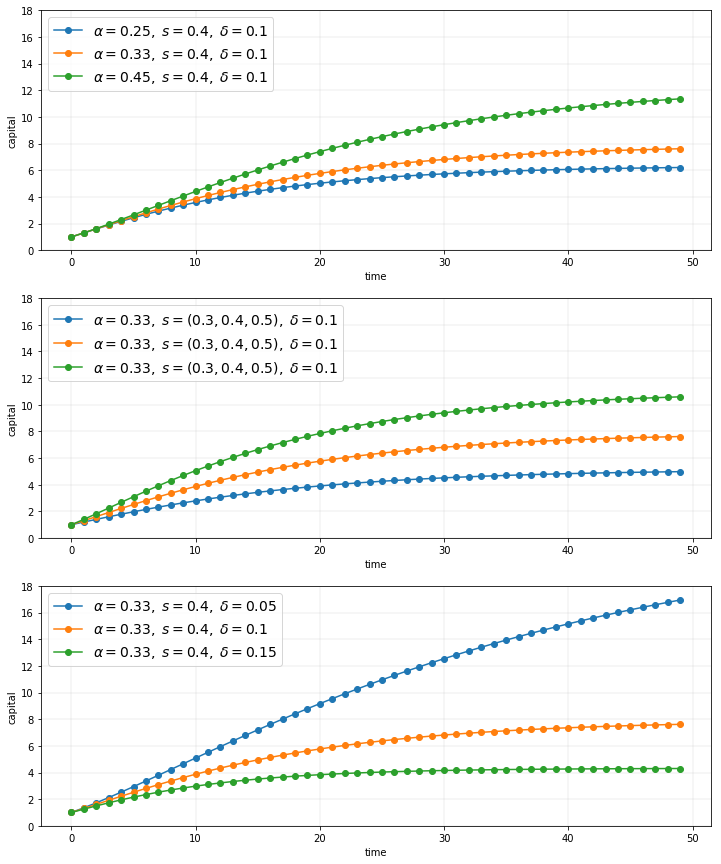

In [2]:
#An example of a bad code

#Based on the Solow model time series creation

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Allocate memory for time series
k = np.empty(50)

fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Trajectories with different α
δ = 0.1
s = 0.4
α = (0.25, 0.33, 0.45)

for j in range(3):
    k[0] = 1
    for t in range(49):
        k[t+1] = s * k[t]**α[j] + (1 - δ) * k[t]
    axes[0].plot(k, 'o-', label=rf"$\alpha = {α[j]},\; s = {s},\; \delta={δ}$")

axes[0].grid(lw=0.2)
axes[0].set_ylim(0, 18)
axes[0].set_xlabel('time')
axes[0].set_ylabel('capital')
axes[0].legend(loc='upper left', frameon=True, fontsize=14)

# Trajectories with different s
δ = 0.1
α = 0.33
s = (0.3, 0.4, 0.5)

for j in range(3):
    k[0] = 1
    for t in range(49):
        k[t+1] = s[j] * k[t]**α + (1 - δ) * k[t]
    axes[1].plot(k, 'o-', label=rf"$\alpha = {α},\; s = {s},\; \delta={δ}$")

axes[1].grid(lw=0.2)
axes[1].set_xlabel('time')
axes[1].set_ylabel('capital')
axes[1].set_ylim(0, 18)
axes[1].legend(loc='upper left', frameon=True, fontsize=14)

# Trajectories with different δ
δ = (0.05, 0.1, 0.15)
α = 0.33
s = 0.4

for j in range(3):
    k[0] = 1
    for t in range(49):
        k[t+1] = s * k[t]**α + (1 - δ[j]) * k[t]
    axes[2].plot(k, 'o-', label=rf"$\alpha = {α},\; s = {s},\; \delta={δ[j]}$")

axes[2].set_ylim(0, 18)
axes[2].set_xlabel('time')
axes[2].set_ylabel('capital')
axes[2].grid(lw=0.2)
axes[2].legend(loc='upper left', frameon=True, fontsize=14)

plt.show()

#### Advices:

* Don’t Use Magic Numbers - means it's better to create a variable and keep it as storage. That way the code becomes more understandable

* Don’t Repeat Yourself - there are douplications in code in the places of time series generation. Reference: [here](https://code.tutsplus.com/tutorials/3-key-software-principles-you-must-understand--net-25161)

* Minimize Global Variables [More on that](http://wiki.c2.com/?GlobalVariablesAreBad). Aditionally, global variables severely slow down the JIT compilation.


##### Notes on the reference ofre code duplication

* Every piece of knowledge must have a single, unambiguous, authoritative representation within a system.

* Make a visual hierarchy of your software application and map the main components to it

* "When you find yourself writing code that is similiar or equal to something you've written before, take a moment to think about what you're doing and don't repeat yourself."


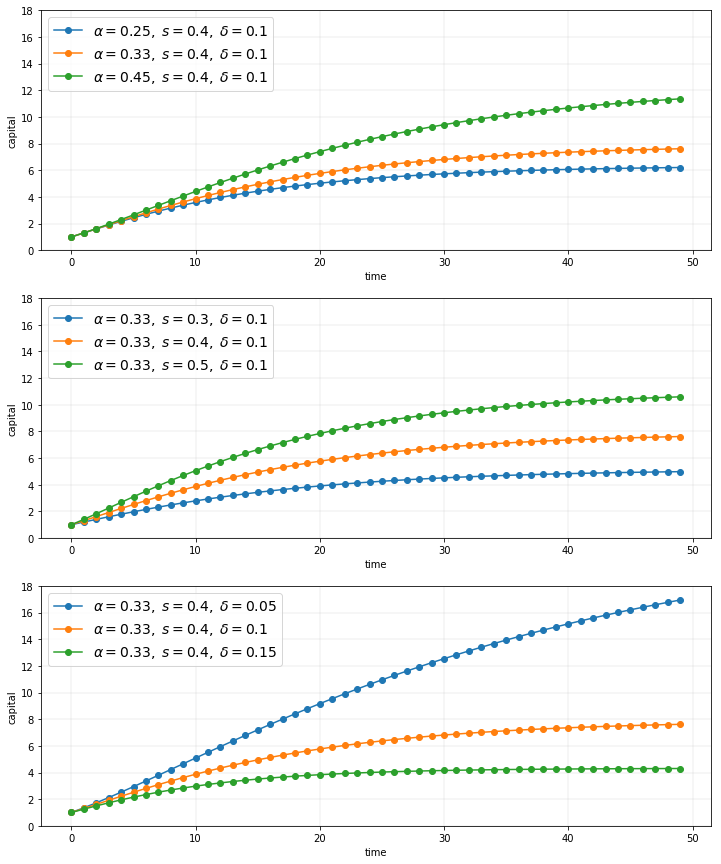

In [3]:
#Rewritten code

from itertools import product

def plot_path(ax, αs, s_vals, δs, series_length=50):
    """
    Add a time series plot to the axes ax for all given parameters.
    """
    k = np.empty(series_length)

    for (α, s, δ) in product(αs, s_vals, δs):
        k[0] = 1
        for t in range(series_length-1):
            k[t+1] = s * k[t]**α + (1 - δ) * k[t]
        ax.plot(k, 'o-', label=rf"$\alpha = {α},\; s = {s},\; \delta = {δ}$")

    ax.grid(lw=0.2)
    ax.set_xlabel('time')
    ax.set_ylabel('capital')
    ax.set_ylim(0, 18)
    ax.legend(loc='upper left', frameon=True, fontsize=14)

fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Parameters (αs, s_vals, δs)
set_one = ([0.25, 0.33, 0.45], [0.4], [0.1])
set_two = ([0.33], [0.3, 0.4, 0.5], [0.1])
set_three = ([0.33], [0.4], [0.05, 0.1, 0.15])

for (ax, params) in zip(axes, (set_one, set_two, set_three)):
    αs, s_vals, δs = params
    plot_path(ax, αs, s_vals, δs)

plt.show()

### Lesson: OOP II: Building Classes

In [2]:
#Example

class Consumer:

    def __init__(self, w):
        "Initialize consumer with w dollars of wealth"
        self.wealth = w

    def earn(self, y):
        "The consumer earns y dollars"
        self.wealth += y

    def spend(self, x):
        "The consumer spends x dollars if feasible"
        new_wealth = self.wealth - x
        if new_wealth < 0:
            print("Insufficent funds")
        else:
            self.wealth = new_wealth

In [ ]:
#The next two lines are equialent

c1.earn(10)
Consumer.earn(c1, 10)


In [3]:
#Example: The Solow Growth Model

class Solow:
    r"""
    Implements the Solow growth model with update rule

        k_{t+1} = [(s z k^α_t) + (1 - δ)k_t] /(1 + n)

    """
    def __init__(self, n=0.05,  # population growth rate
                       s=0.25,  # savings rate
                       δ=0.1,   # depreciation rate
                       α=0.3,   # share of labor
                       z=2.0,   # productivity
                       k=1.0):  # current capital stock

        self.n, self.s, self.δ, self.α, self.z = n, s, δ, α, z
        self.k = k

    def h(self):
        "Evaluate the h function"
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Apply the update rule
        return (s * z * self.k**α + (1 - δ) * self.k) / (1 + n)

    def update(self):
        "Update the current state (i.e., the capital stock)."
        self.k =  self.h()

    def steady_state(self):
        "Compute the steady state value of capital."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Compute and return steady state
        return ((s * z) / (n + δ))**(1 / (1 - α))

    def generate_sequence(self, t):
        "Generate and return a time series of length t"
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path

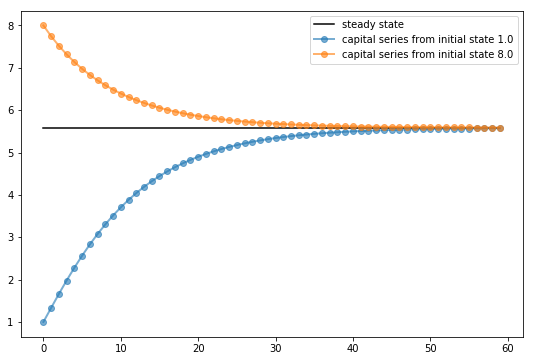

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

s1 = Solow()
s2 = Solow(k=8.0)

T = 60
fig, ax = plt.subplots(figsize=(9, 6))

# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')

# Plot time series for each economy
for s in s1, s2:
    lb = f'capital series from initial state {s.k}'
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)

ax.legend()
plt.show()

In [5]:
#Example; A market

from scipy.integrate import quad

class Market:

    def __init__(self, ad, bd, az, bz, tax):
        """
        Set up market parameters.  All parameters are scalars.  See
        https://lectures.quantecon.org/py/python_oop.html for interpretation.

        """
        self.ad, self.bd, self.az, self.bz, self.tax = ad, bd, az, bz, tax
        if ad < az:
            raise ValueError('Insufficient demand.')

    def price(self):
        "Return equilibrium price"
        return  (self.ad - self.az + self.bz * self.tax) / (self.bd + self.bz)

    def quantity(self):
        "Compute equilibrium quantity"
        return  self.ad - self.bd * self.price()

    def consumer_surp(self):
        "Compute consumer surplus"
        # == Compute area under inverse demand function == #
        integrand = lambda x: (self.ad / self.bd) - (1 / self.bd) * x
        area, error = quad(integrand, 0, self.quantity())
        return area - self.price() * self.quantity()

    def producer_surp(self):
        "Compute producer surplus"
        #  == Compute area above inverse supply curve, excluding tax == #
        integrand = lambda x: -(self.az / self.bz) + (1 / self.bz) * x
        area, error = quad(integrand, 0, self.quantity())
        return (self.price() - self.tax) * self.quantity() - area

    def taxrev(self):
        "Compute tax revenue"
        return self.tax * self.quantity()

    def inverse_demand(self, x):
        "Compute inverse demand"
        return self.ad / self.bd - (1 / self.bd)* x

    def inverse_supply(self, x):
        "Compute inverse supply curve"
        return -(self.az / self.bz) + (1 / self.bz) * x + self.tax

    def inverse_supply_no_tax(self, x):
        "Compute inverse supply curve without tax"
        return -(self.az / self.bz) + (1 / self.bz) * x

In [6]:
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)
print("equilibrium price = ", m.price())

equilibrium price =  18.5


In [7]:
print("consumer surplus = ", m.consumer_surp())

consumer surplus =  33.0625


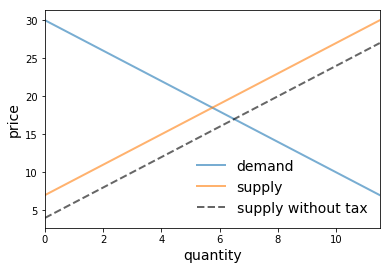

In [8]:
import numpy as np

# Baseline ad, bd, az, bz, tax
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)

q_max = m.quantity() * 2
q_grid = np.linspace(0.0, q_max, 100)
pd = m.inverse_demand(q_grid)
ps = m.inverse_supply(q_grid)
psno = m.inverse_supply_no_tax(q_grid)

fig, ax = plt.subplots()
ax.plot(q_grid, pd, lw=2, alpha=0.6, label='demand')
ax.plot(q_grid, ps, lw=2, alpha=0.6, label='supply')
ax.plot(q_grid, psno, '--k', lw=2, alpha=0.6, label='supply without tax')
ax.set_xlabel('quantity', fontsize=14)
ax.set_xlim(0, q_max)
ax.set_ylabel('price', fontsize=14)
ax.legend(loc='lower right', frameon=False, fontsize=14)
plt.show()

In [11]:
#Example: Chaos

class Chaos:
  """
  Models the dynamical system with :math:`x_{t+1} = r x_t (1 - x_t)`
  """
  def __init__(self, x0, r):
      """
      Initialize with state x0 and parameter r
      """
      self.x, self.r = x0, r

  def update(self):
      "Apply the map to update state."
      self.x =  self.r * self.x *(1 - self.x)

  def generate_sequence(self, n):
      "Generate and return a sequence of length n."
      path = []
      for i in range(n):
          path.append(self.x)
          self.update()
      return path

In [12]:
ch = Chaos(0.1, 4.0)     # x0 = 0.1 and r = 0.4
ch.generate_sequence(5)  # First 5 iterates

[0.1, 0.36000000000000004, 0.9216, 0.28901376000000006, 0.8219392261226498]

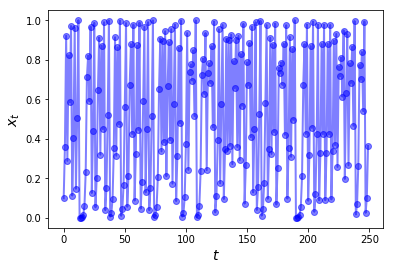

In [13]:
ch = Chaos(0.1, 4.0)
ts_length = 250

fig, ax = plt.subplots()
ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$x_t$', fontsize=14)
x = ch.generate_sequence(ts_length)
ax.plot(range(ts_length), x, 'bo-', alpha=0.5, lw=2, label='$x_t$')
plt.show()

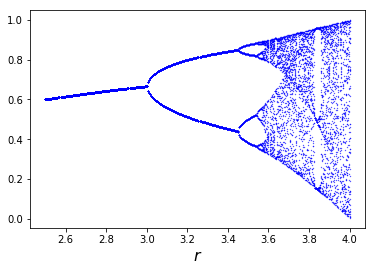

In [14]:
#Bifrucation Diagram

fig, ax = plt.subplots()
ch = Chaos(0.1, 4)
r = 2.5
while r < 4:
    ch.r = r
    t = ch.generate_sequence(1000)[950:]
    ax.plot([r] * len(t), t, 'b.', ms=0.6)
    r = r + 0.005

ax.set_xlabel('$r$', fontsize=16)
plt.show()

![Ex1](img/oop2_1.png)

In [ ]:
#Code should work this way:
from random import uniform

samples = [uniform(0, 1) for i in range(10)]
F = ECDF(samples)
F(0.5)  # Evaluate ecdf at x = 0.5

F.observations = [uniform(0, 1) for i in range(1000)]
F(0.5)

In [19]:
#Ex1

class ECDF:
    """
    Implements the Empirical Cumulative Distribution Function: F_n(x) = (1/n) * SUM(Indic(X_i<=x))
    """
    def __init__(self, sample):
        """
        Inititalization with a sample
        """
        self.observations = sample
    
    def __call__(self, x):
        """
        Computes the ECDF for the given parameter x
        """
        #Tried to implement without using numpy for chacking elements in self.observations, so used a generator
        return (1/len(self.observations)) * sum ([element <= x for element in self.observations])
      

In [20]:
#Testing

from random import uniform

samples = [uniform(0, 1) for i in range(10)]
F = ECDF(samples)
F(0.5)  # Evaluate ecdf at x = 0.5

F.observations = [uniform(0, 1) for i in range(1000)]
F(0.5)

0.513

![Ex1](img/oop2_2.png)

In [42]:
class Polynomial:
    """
    A class for manipulating and representing polynomial functions
    """
    def __init__(self, coefficients):
        """
        Inititalization with a list of coefficients
        """
        self.coeff = coefficients
    
    def __call__(self, x):
        """
        Evaluates the polynomial, returns p(x) for given x
        """
        print(self.coeff)
        return sum ([coef * x ** i for i,coef in enumerate(self.coeff)])
    
    def differ(self):
        """
        Differentiates the polynomial, replaces the coefficients with those of its derivative p'
        """
        #Multiplicating the coefficients with powers of x and removing the first coefficient        
        self.coeff = [coef * i for i,coef in enumerate(self.coeff)][1:]
        

In [43]:
coeff = [1,2,3]
P = Polynomial(coeff)
print(P(1))  # Evaluate for the x=1

P.differ()
print(P(1))  # Evaluate the differentiated polynomial for the x=1

[1, 2, 3]
6
[2, 6]
8


### Lesson: OOP III: The Samuelson Accelerator

In [ ]:
# Samuelson’s Model

#informative graph drawing

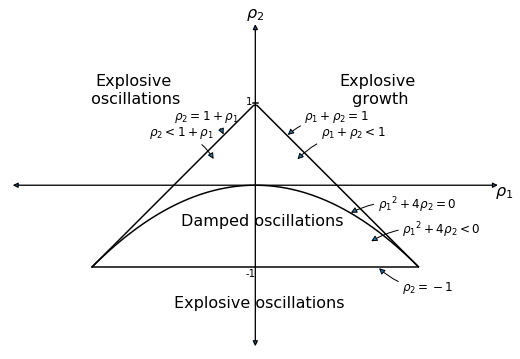

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def param_plot():

    """this function creates the graph on page 189 of Sargent Macroeconomic Theory, second edition, 1987"""

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_aspect('equal')

    # Set axis
    xmin, ymin = -3, -2
    xmax, ymax = -xmin, -ymin
    plt.axis([xmin, xmax, ymin, ymax])

    # Set axis labels
    ax.set(xticks=[], yticks=[])
    ax.set_xlabel(r'$\rho_2$', fontsize=16)
    ax.xaxis.set_label_position('top')
    ax.set_ylabel(r'$\rho_1$', rotation=0, fontsize=16)
    ax.yaxis.set_label_position('right')

    # Draw (t1, t2) points
    ρ1 = np.linspace(-2, 2, 100)
    ax.plot(ρ1, -abs(ρ1) + 1, c='black')
    ax.plot(ρ1, np.ones_like(ρ1) * -1, c='black')
    ax.plot(ρ1, -(ρ1**2 / 4), c='black')

    # Turn normal axes off
    for spine in ['left', 'bottom', 'top', 'right']:
        ax.spines[spine].set_visible(False)

    # Add arrows to represent axes
    axes_arrows = {'arrowstyle': '<|-|>', 'lw': 1.3}
    ax.annotate('', xy=(xmin, 0), xytext=(xmax, 0), arrowprops=axes_arrows)
    ax.annotate('', xy=(0, ymin), xytext=(0, ymax), arrowprops=axes_arrows)

    # Annotate the plot with equations
    plot_arrowsl = {'arrowstyle': '-|>', 'connectionstyle': "arc3, rad=-0.2"}
    plot_arrowsr = {'arrowstyle': '-|>', 'connectionstyle': "arc3, rad=0.2"}
    ax.annotate(r'$\rho_1 + \rho_2 < 1$', xy=(0.5, 0.3), xytext=(0.8, 0.6),
                arrowprops=plot_arrowsr, fontsize='12')
    ax.annotate(r'$\rho_1 + \rho_2 = 1$', xy=(0.38, 0.6), xytext=(0.6, 0.8),
                arrowprops=plot_arrowsr, fontsize='12')
    ax.annotate(r'$\rho_2 < 1 + \rho_1$', xy=(-0.5, 0.3), xytext=(-1.3, 0.6),
                arrowprops=plot_arrowsl, fontsize='12')
    ax.annotate(r'$\rho_2 = 1 + \rho_1$', xy=(-0.38, 0.6), xytext=(-1, 0.8),
                arrowprops=plot_arrowsl, fontsize='12')
    ax.annotate(r'$\rho_2 = -1$', xy=(1.5, -1), xytext=(1.8, -1.3),
                arrowprops=plot_arrowsl, fontsize='12')
    ax.annotate(r'${\rho_1}^2 + 4\rho_2 = 0$', xy=(1.15, -0.35),
                xytext=(1.5, -0.3), arrowprops=plot_arrowsr, fontsize='12')
    ax.annotate(r'${\rho_1}^2 + 4\rho_2 < 0$', xy=(1.4, -0.7),
                xytext=(1.8, -0.6), arrowprops=plot_arrowsr, fontsize='12')

    # Label categories of solutions
    ax.text(1.5, 1, 'Explosive\n growth', ha='center', fontsize=16)
    ax.text(-1.5, 1, 'Explosive\n oscillations', ha='center', fontsize=16)
    ax.text(0.05, -1.5, 'Explosive oscillations', ha='center', fontsize=16)
    ax.text(0.09, -0.5, 'Damped oscillations', ha='center', fontsize=16)

    # Add small marker to y-axis
    ax.axhline(y=1.005, xmin=0.495, xmax=0.505, c='black')
    ax.text(-0.12, -1.12, '-1', fontsize=10)
    ax.text(-0.12, 0.98, '1', fontsize=10)

    return fig

param_plot()
plt.show()

In [2]:
#Function to describe implications of characteristic polynomial

def categorize_solution(ρ1, ρ2):
    """this function takes values of ρ1 and ρ2 and uses them to classify the type of solution"""

    discriminant = ρ1 ** 2 + 4 * ρ2
    if ρ2 > 1 + ρ1 or ρ2 < -1:
        print('Explosive oscillations')
    elif ρ1 + ρ2 > 1:
        print('Explosive growth')
    elif discriminant < 0:
        print('Roots are complex with modulus less than one; therefore damped oscillations')
    else:
        print('Roots are real and absolute values are less than zero; therefore get smooth convergence to a steady state')

In [3]:
### Test the categorize_solution function

categorize_solution(1.3, -.4)

Roots are real and absolute values are less than zero; therefore get smooth convergence to a steady state


In [4]:
#Function for plotting Y_t paths

def plot_y(function=None):
    """function plots path of Y_t"""
    plt.subplots(figsize=(10, 6))
    plt.plot(function)
    plt.xlabel('Time $t$')
    plt.ylabel('$Y_t$', rotation=0)
    plt.grid()
    plt.show()

ρ_1 is 1.42
ρ_2 is -0.5
Two real roots: 
[-0.6459687576256715, -0.7740312423743284]
Absolute values of roots are less than one


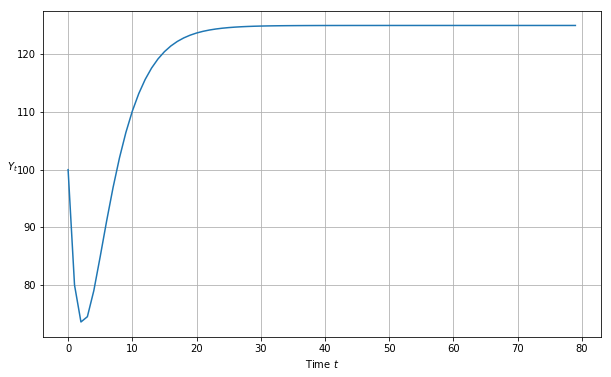

In [5]:
#The following function calculates roots of the characteristic polynomial using high school algebra


from cmath import sqrt

##=== This is a 'manual' method ===#

def y_nonstochastic(y_0=100, y_1=80, α=.92, β=.5, γ=10, n=80):

    """Takes values of parameters and computes roots of characteristic polynomial.
       It tells whether they are real or complex and whether they are less than unity in absolute value.
       It also computes a simulation of length n starting from the two given initial conditions for national income"""

    roots = []

    ρ1 = α + β
    ρ2 = -β

    print(f'ρ_1 is {ρ1}')
    print(f'ρ_2 is {ρ2}')

    discriminant = ρ1 ** 2 + 4 * ρ2

    if discriminant == 0:
        roots.append(-ρ1 / 2)
        print('Single real root: ')
        print(''.join(str(roots)))
    elif discriminant > 0:
        roots.append((-ρ1 + sqrt(discriminant).real) / 2)
        roots.append((-ρ1 - sqrt(discriminant).real) / 2)
        print('Two real roots: ')
        print(''.join(str(roots)))
    else:
        roots.append((-ρ1 + sqrt(discriminant)) / 2)
        roots.append((-ρ1 - sqrt(discriminant)) / 2)
        print('Two complex roots: ')
        print(''.join(str(roots)))

    if all(abs(root) < 1 for root in roots):
        print('Absolute values of roots are less than one')
    else:
        print('Absolute values of roots are not less than one')

    def transition(x, t): return ρ1 * x[t - 1] + ρ2 * x[t - 2] + γ

    y_t = [y_0, y_1]

    for t in range(2, n):
        y_t.append(transition(y_t, t))

    return y_t

plot_y(y_nonstochastic())

![Img1](img/oop3_1.png)

In [6]:
### code to reverse engineer a  cycle
### y_t = r^t (c_1 cos(ϕ t) + c2 sin(ϕ t))
###

import cmath
import math

def f(r, ϕ):
    """
    Takes modulus r and angle ϕ of complex number r exp(j ϕ)
    and creates ρ1 and ρ2 of characteristic polynomial for which
    r exp(j ϕ) and r exp(- j ϕ) are complex roots.

    Returns the multiplier coefficient a and the accelerator coefficient b
    that verifies those roots.
    """
    g1 = cmath.rect(r, ϕ)  # Generate two complex roots
    g2 = cmath.rect(r, -ϕ)
    ρ1 = g1 + g2           # Implied ρ1, ρ2
    ρ2 = -g1 * g2
    b = -ρ2                # Reverse engineer a and b that validate these
    a = ρ1 - b
    return ρ1, ρ2, a, b

## Now let's use the function in an example
## Here are the example paramters

r = .95
period = 10                # Length of cycle in units of time
ϕ = 2 * math.pi/period

## Apply the function

ρ1, ρ2, a, b = f(r, ϕ)

print(f"a, b = {a}, {b}")
print(f"ρ1, ρ2 = {ρ1}, {ρ2}")

a, b = (0.6346322893124001+0j), (0.9024999999999999-0j)
ρ1, ρ2 = (1.5371322893124+0j), (-0.9024999999999999+0j)


In [7]:
## Print the real components of ρ1 and ρ2

ρ1 = ρ1.real
ρ2 = ρ2.real

ρ1, ρ2

(1.5371322893124, -0.9024999999999999)

In [8]:
#Root finding using numpy

r1, r2 = np.roots([1, -ρ1, -ρ2])

p1 = cmath.polar(r1)
p2 = cmath.polar(r2)

print(f"r, ϕ = {r}, {ϕ}")
print(f"p1, p2 = {p1}, {p2}")
# print(f"g1, g2 = {g1}, {g2}")

print(f"a, b = {a}, {b}")
print(f"ρ1, ρ2 = {ρ1}, {ρ2}")

r, ϕ = 0.95, 0.6283185307179586
p1, p2 = (0.95, 0.6283185307179586), (0.95, -0.6283185307179586)
a, b = (0.6346322893124001+0j), (0.9024999999999999-0j)
ρ1, ρ2 = 1.5371322893124, -0.9024999999999999


Roots are complex with modulus less than one; therefore damped oscillations
Roots are [0.85+0.27838822j 0.85-0.27838822j]
Roots are complex
Roots are less than one


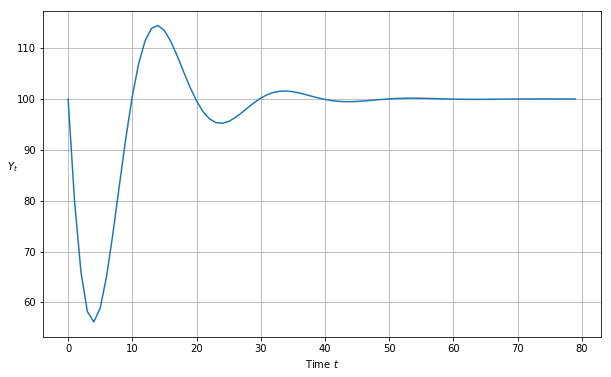

In [9]:
##=== This method uses numpy to calculate roots ===#


def y_nonstochastic(y_0=100, y_1=80, α=.9, β=.8, γ=10, n=80):

    """ Rather than computing the roots of the characteristic polynomial by hand as we did earlier, this function
    enlists numpy to do the work for us """

    # Useful constants
    ρ1 = α + β
    ρ2 = -β

    categorize_solution(ρ1, ρ2)

    # Find roots of polynomial
    roots = np.roots([1, -ρ1, -ρ2])
    print(f'Roots are {roots}')

    # Check if real or complex
    if all(isinstance(root, complex) for root in roots):
        print('Roots are complex')
    else:
        print('Roots are real')

    # Check if roots are less than one
    if all(abs(root) < 1 for root in roots):
        print('Roots are less than one')
    else:
        print('Roots are not less than one')

    # Define transition equation
    def transition(x, t): return ρ1 * x[t - 1] + ρ2 * x[t - 2] + γ

    # Set initial conditions
    y_t = [y_0, y_1]

    # Generate y_t series
    for t in range(2, n):
        y_t.append(transition(y_t, t))

    return y_t

plot_y(y_nonstochastic())

a, b = 0.6180339887498949, 1.0
Roots are complex with modulus less than one; therefore damped oscillations
Roots are [0.80901699+0.58778525j 0.80901699-0.58778525j]
Roots are complex
Roots are less than one


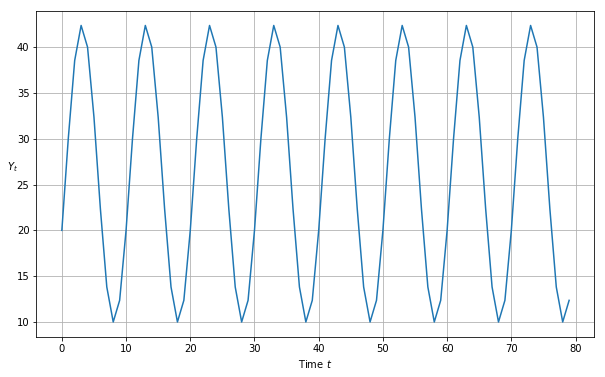

In [10]:
#Reverse engineered complex roots

r = 1   # generates undamped, nonexplosive cycles

period = 10   #  length of cycle in units of time
ϕ = 2 * math.pi/period

## Apply the reverse engineering function f

ρ1, ρ2, a, b = f(r, ϕ)

a = a.real  # drop the imaginary part so that it is a valid input into y_nonstochastic
b = b.real

print(f"a, b = {a}, {b}")

ytemp = y_nonstochastic(α=a, β=b, y_0=20, y_1=30)
plot_y(ytemp)

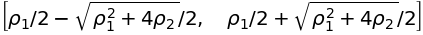

In [11]:
#Digression: using sympy to find roots

import sympy
from sympy import Symbol, init_printing
init_printing()

r1 = Symbol("ρ_1")
r2 = Symbol("ρ_2")
z = Symbol("z")

sympy.solve(z**2 - r1*z - r2, z)

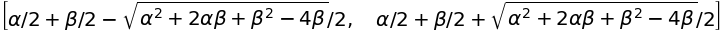

In [12]:
a = Symbol("α")
b = Symbol("β")
r1 = a + b
r2 = -b

sympy.solve(z**2 - r1*z - r2, z)

Roots are real and absolute values are less than zero; therefore get smooth convergence to a steady state
[0.7236068 0.2763932]
Roots are real
Roots are less than one


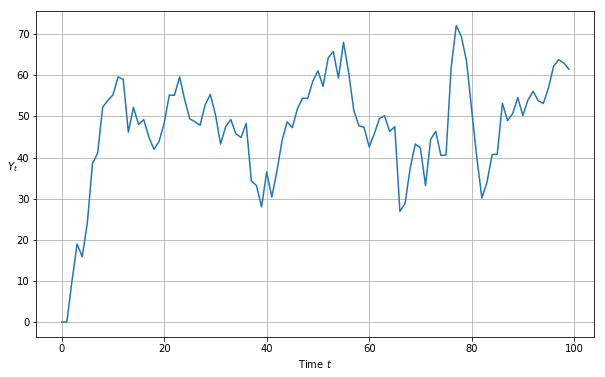

In [13]:
#Stochastic shocks

def y_stochastic(y_0=0, y_1=0, α=0.8, β=0.2, γ=10, n=100, σ=5):

    """This function takes parameters of a stochastic version of the model and proceeds to analyze
    the roots of the characteristic polynomial and also generate a simulation"""

    # Useful constants
    ρ1 = α + β
    ρ2 = -β

    # Categorize solution
    categorize_solution(ρ1, ρ2)

    # Find roots of polynomial
    roots = np.roots([1, -ρ1, -ρ2])
    print(roots)

    # Check if real or complex
    if all(isinstance(root, complex) for root in roots):
        print('Roots are complex')
    else:
        print('Roots are real')

    # Check if roots are less than one
    if all(abs(root) < 1 for root in roots):
        print('Roots are less than one')
    else:
        print('Roots are not less than one')

    # Generate shocks
    ϵ = np.random.normal(0, 1, n)

    # Define transition equation
    def transition(x, t): return ρ1 * \
        x[t - 1] + ρ2 * x[t - 2] + γ + σ * ϵ[t]

    # Set initial conditions
    y_t = [y_0, y_1]

    # Generate y_t series
    for t in range(2, n):
        y_t.append(transition(y_t, t))

    return y_t

plot_y(y_stochastic())

a, b = 0.6285929690873979, 0.9409000000000001
Roots are complex with modulus less than one; therefore damped oscillations
[0.78474648+0.57015169j 0.78474648-0.57015169j]
Roots are complex
Roots are less than one


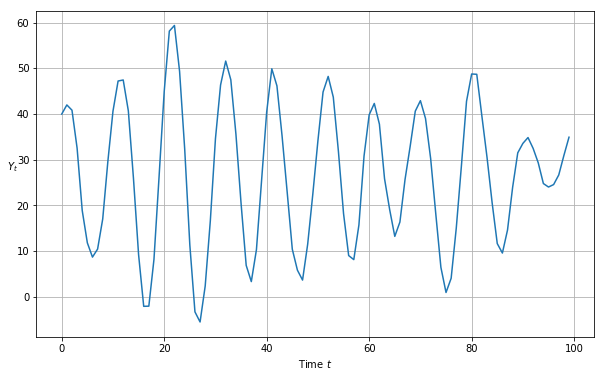

In [14]:
#Simulation in which there are shocks and the characteristic polynomial has complex roots

r = .97

period = 10   #  length of cycle in units of time
ϕ = 2 * math.pi/period

### apply the  reverse engineering function f

ρ1, ρ2, a, b = f(r, ϕ)

a = a.real  # drop the imaginary part so that it is a valid input into y_nonstochastic
b = b.real

print(f"a, b = {a}, {b}")
plot_y(y_stochastic(y_0=40, y_1 = 42, α=a, β=b, σ=2, n=100))

In [15]:
"""
This function computes a response to either a permanent or one-off increase in government expenditures
"""

def y_stochastic_g(y_0=20,
                   y_1=20,
                   α=0.8,
                   β=0.2,
                   γ=10,
                   n=100,
                   σ=2,
                   g=0,
                   g_t=0,
                   duration='permanent'):

    """This program computes a response to a permanent increase in government expenditures that occurs
       at time 20"""

    # Useful constants
    ρ1 = α + β
    ρ2 = -β

    # Categorize solution
    categorize_solution(ρ1, ρ2)

    # Find roots of polynomial
    roots = np.roots([1, -ρ1, -ρ2])
    print(roots)

    # Check if real or complex
    if all(isinstance(root, complex) for root in roots):
        print('Roots are complex')
    else:
        print('Roots are real')

    # Check if roots are less than one
    if all(abs(root) < 1 for root in roots):
        print('Roots are less than one')
    else:
        print('Roots are not less than one')

    # Generate shocks
    ϵ = np.random.normal(0, 1, n)

    def transition(x, t, g):

        # Non-stochastic - separated to avoid generating random series when not needed
        if σ == 0:
            return ρ1 * x[t - 1] + ρ2 * x[t - 2] + γ + g

        # Stochastic
        else:
            ϵ = np.random.normal(0, 1, n)
            return ρ1 * x[t - 1] + ρ2 * x[t - 2] + γ + g + σ * ϵ[t]

    # Create list and set initial conditions
    y_t = [y_0, y_1]

    # Generate y_t series
    for t in range(2, n):

        # No government spending
        if g == 0:
            y_t.append(transition(y_t, t))

        # Government spending (no shock)
        elif g != 0 and duration == None:
            y_t.append(transition(y_t, t))

        # Permanent government spending shock
        elif duration == 'permanent':
            if t < g_t:
                y_t.append(transition(y_t, t, g=0))
            else:
                y_t.append(transition(y_t, t, g=g))

        # One-off government spending shock
        elif duration == 'one-off':
            if t == g_t:
                y_t.append(transition(y_t, t, g=g))
            else:
                y_t.append(transition(y_t, t, g=0))
    return y_t




Roots are real and absolute values are less than zero; therefore get smooth convergence to a steady state
[0.7236068 0.2763932]
Roots are real
Roots are less than one


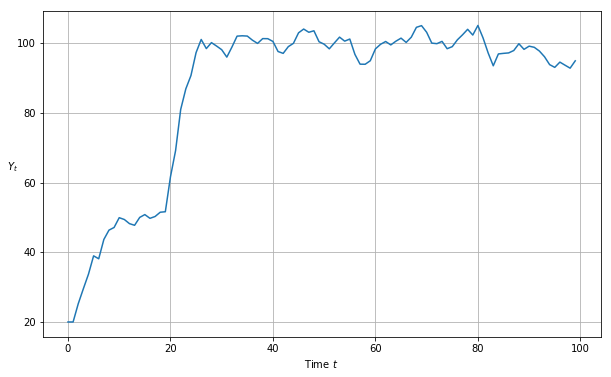

In [16]:
#A permanent government spending shock can be simulated as follows

plot_y(y_stochastic_g(g=10, g_t=20, duration='permanent'))

Roots are real and absolute values are less than zero; therefore get smooth convergence to a steady state
[0.7236068 0.2763932]
Roots are real
Roots are less than one


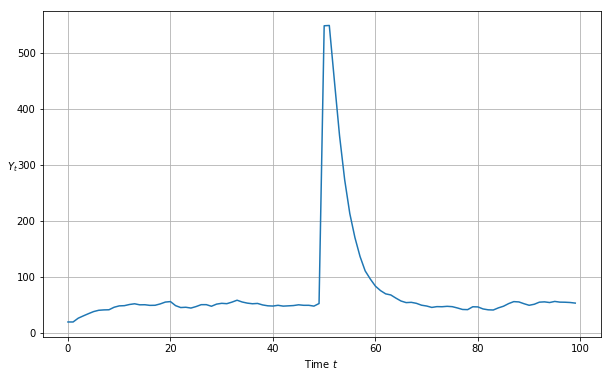

In [17]:
#We can also see the response to a one time jump in government expenditures

plot_y(y_stochastic_g(g=500, g_t=50, duration='one-off'))

In [18]:
#Wrapping everything into a class

class Samuelson():

    r"""This class represents the Samuelson model, otherwise known as the
    multiple-accelerator model. The model combines the Keynesian multiplier
    with the accelerator theory of investment.

    The path of output is governed by a linear second-order difference equation

    .. math::

        Y_t =  + \alpha (1 + \beta) Y_{t-1} - \alpha \beta Y_{t-2}

    Parameters
    ----------
    y_0 : scalar
        Initial condition for Y_0
    y_1 : scalar
        Initial condition for Y_1
    α : scalar
        Marginal propensity to consume
    β : scalar
        Accelerator coefficient
    n : int
        Number of iterations
    σ : scalar
        Volatility parameter. Must be greater than or equal to 0. Set
        equal to 0 for non-stochastic model.
    g : scalar
        Government spending shock
    g_t : int
        Time at which government spending shock occurs. Must be specified
        when duration != None.
    duration : {None, 'permanent', 'one-off'}
        Specifies type of government spending shock. If none, government
        spending equal to g for all t.

    """

    def __init__(self,
                 y_0=100,
                 y_1=50,
                 α=1.3,
                 β=0.2,
                 γ=10,
                 n=100,
                 σ=0,
                 g=0,
                 g_t=0,
                 duration=None):

        self.y_0, self.y_1, self.α, self.β = y_0, y_1, α, β
        self.n, self.g, self.g_t, self.duration = n, g, g_t, duration
        self.γ, self.σ = γ, σ
        self.ρ1 = α + β
        self.ρ2 = -β
        self.roots = np.roots([1, -self.ρ1, -self.ρ2])

    def root_type(self):
        if all(isinstance(root, complex) for root in self.roots):
            return 'Complex conjugate'
        elif len(self.roots) > 1:
            return 'Double real'
        else:
            return 'Single real'

    def root_less_than_one(self):
        if all(abs(root) < 1 for root in self.roots):
            return True

    def solution_type(self):
        ρ1, ρ2 = self.ρ1, self.ρ2
        discriminant = ρ1 ** 2 + 4 * ρ2
        if ρ2 >= 1 + ρ1 or ρ2 <= -1:
            return 'Explosive oscillations'
        elif ρ1 + ρ2 >= 1:
            return 'Explosive growth'
        elif discriminant < 0:
            return 'Damped oscillations'
        else:
            return 'Steady state'

    def _transition(self, x, t, g):

        # Non-stochastic - separated to avoid generating random series when not needed
        if self.σ == 0:
            return self.ρ1 * x[t - 1] + self.ρ2 * x[t - 2] + self.γ + g

        # Stochastic
        else:
            ϵ = np.random.normal(0, 1, self.n)
            return self.ρ1 * x[t - 1] + self.ρ2 * x[t - 2] + self.γ + g + self.σ * ϵ[t]

    def generate_series(self):

        # Create list and set initial conditions
        y_t = [self.y_0, self.y_1]

        # Generate y_t series
        for t in range(2, self.n):

            # No government spending
            if self.g == 0:
                y_t.append(self._transition(y_t, t))

            # Government spending (no shock)
            elif self.g != 0 and self.duration == None:
                y_t.append(self._transition(y_t, t))

            # Permanent government spending shock
            elif self.duration == 'permanent':
                if t < self.g_t:
                    y_t.append(self._transition(y_t, t, g=0))
                else:
                    y_t.append(self._transition(y_t, t, g=self.g))

            # One-off government spending shock
            elif self.duration == 'one-off':
                if t == self.g_t:
                    y_t.append(self._transition(y_t, t, g=self.g))
                else:
                    y_t.append(self._transition(y_t, t, g=0))
        return y_t

    def summary(self):
        print('Summary\n' + '-' * 50)
        print(f'Root type: {self.root_type()}')
        print(f'Solution type: {self.solution_type()}')
        print(f'Roots: {str(self.roots)}')

        if self.root_less_than_one() == True:
            print('Absolute value of roots is less than one')
        else:
            print('Absolute value of roots is not less than one')

        if self.σ > 0:
            print('Stochastic series with σ = ' + str(self.σ))
        else:
            print('Non-stochastic series')

        if self.g != 0:
            print('Government spending equal to ' + str(self.g))

        if self.duration != None:
            print(self.duration.capitalize() +
                  ' government spending shock at t = ' + str(self.g_t))

    def plot(self):
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(self.generate_series())
        ax.set(xlabel='Iteration', xlim=(0, self.n))
        ax.set_ylabel('$Y_t$', rotation=0)
        ax.grid()

        # Add parameter values to plot
        paramstr = f'$\\alpha={self.α:.2f}$ \n $\\beta={self.β:.2f}$ \n $\\gamma={self.γ:.2f}$ \n \
$\\sigma={self.σ:.2f}$ \n $\\rho_1={self.ρ1:.2f}$ \n $\\rho_2={self.ρ2:.2f}$'
        props = dict(fc='white', pad=10, alpha=0.5)
        ax.text(0.87, 0.05, paramstr, transform=ax.transAxes,
                fontsize=12, bbox=props, va='bottom')

        return fig

    def param_plot(self):

        # Uses the param_plot() function defined earlier (it is then able
        # to be used standalone or as part of the model)

        fig = param_plot()
        ax = fig.gca()

        # Add λ values to legend
        for i, root in enumerate(self.roots):
            if isinstance(root, complex):
                operator = ['+', '']  # Need to fill operator for positive as string is split apart
                label = rf'$\lambda_{i+1} = {sam.roots[i].real:.2f} {operator[i]} {sam.roots[i].imag:.2f}i$'
            else:
                label = rf'$\lambda_{i+1} = {sam.roots[i].real:.2f}$'
            ax.scatter(0, 0, 0, label=label) # dummy to add to legend

        # Add ρ pair to plot
        ax.scatter(self.ρ1, self.ρ2, 100, 'red', '+', label=r'$(\ \rho_1, \ \rho_2 \ )$', zorder=5)

        plt.legend(fontsize=12, loc=3)

        return fig

In [19]:
#Illustration of Samuelson class

sam = Samuelson(α=0.8, β=0.5, σ=2, g=10, g_t=20, duration='permanent')
sam.summary()

Summary
--------------------------------------------------
Root type: Complex conjugate
Solution type: Damped oscillations
Roots: [0.65+0.27838822j 0.65-0.27838822j]
Absolute value of roots is less than one
Stochastic series with σ = 2
Government spending equal to 10
Permanent government spending shock at t = 20


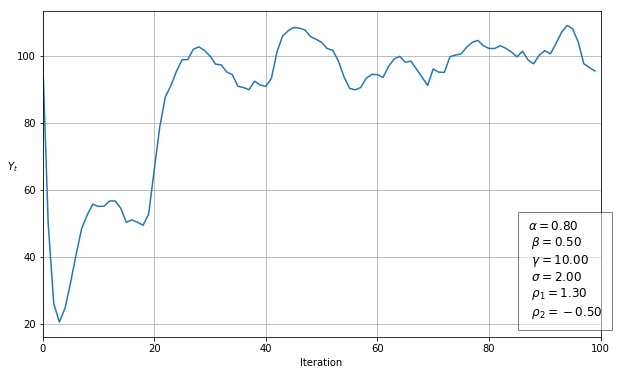

In [20]:
sam.plot()
plt.show()

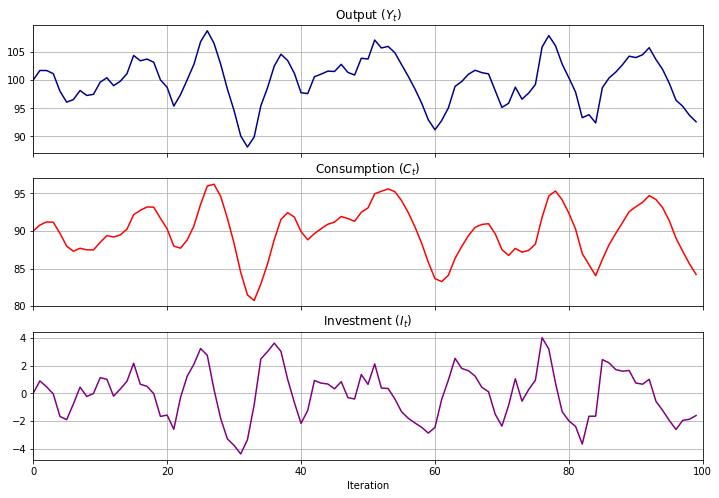

In [21]:
#Using the LinearStateSpace class

from quantecon import LinearStateSpace

""" This script maps the Samuelson model in the the LinearStateSpace class"""
α = 0.8
β = 0.9
ρ1 = α + β
ρ2 = -β
γ = 10
σ = 1
g = 10
n = 100

A = [[1,        0,      0],
     [γ + g,   ρ1,     ρ2],
     [0,        1,      0]]

G = [[γ + g, ρ1,   ρ2],         # this is Y_{t+1}
     [γ,      α,    0],         # this is C_{t+1}
     [0,      β,   -β]]         # this is I_{t+1}

μ_0 = [1, 100, 100]
C = np.zeros((3,1))
C[1] = σ # stochastic

sam_t = LinearStateSpace(A, C, G, mu_0=μ_0)

x, y = sam_t.simulate(ts_length=n)

fig, axes = plt.subplots(3, 1, sharex=True, figsize=(12, 8))
titles = ['Output ($Y_t$)', 'Consumption ($C_t$)', 'Investment ($I_t$)']
colors = ['darkblue', 'red', 'purple']
for ax, series, title, color in zip(axes, y, titles, colors):
    ax.plot(series, color=color)
    ax.set(title=title, xlim=(0, n))
    ax.grid()

axes[-1].set_xlabel('Iteration')

plt.show()

In [22]:
#plot impulse response functions

imres = sam_t.impulse_response()
imres = np.asarray(imres)
y1 = imres[:, :, 0]
y2 = imres[:, :, 1]
y1.shape

In [23]:
A = np.asarray(A)
w, v = np.linalg.eig(A)
print(w)

[0.85+0.42130749j 0.85-0.42130749j 1.  +0.j        ]


In [24]:
#Inheriting methods from LinearStateSpace

class SamuelsonLSS(LinearStateSpace):

    """
    this subclass creates a Samuelson multiplier-accelerator model
    as a linear state space system
    """
    def __init__(self,
                 y_0=100,
                 y_1=100,
                 α=0.8,
                 β=0.9,
                 γ=10,
                 σ=1,
                 g=10):

        self.α, self.β = α, β
        self.y_0, self.y_1, self.g = y_0, y_1, g
        self.γ, self.σ = γ, σ

        # Define intial conditions
        self.μ_0 = [1, y_0, y_1]

        self.ρ1 = α + β
        self.ρ2 = -β

        # Define transition matrix
        self.A = [[1,                 0,         0],
                  [γ + g,       self.ρ1,   self.ρ2],
                  [0,                 1,         0]]

        # Define output matrix
        self.G = [[γ + g, self.ρ1, self.ρ2],         # this is Y_{t+1}
                  [γ,           α,       0],         # this is C_{t+1}
                  [0,           β,      -β]]         # this is I_{t+1}

        self.C = np.zeros((3, 1))
        self.C[1] = σ  # stochastic

        # Initialize LSS with parameters from Samuleson model
        LinearStateSpace.__init__(self, self.A, self.C, self.G, mu_0=self.μ_0)

    def plot_simulation(self, ts_length=100, stationary=True):

        # Temporarily store original parameters
        temp_μ = self.μ_0
        temp_Σ = self.Sigma_0

        # Set distribution parameters equal to their stationary values for simulation
        if stationary == True:
            try:
                self.μ_x, self.μ_y, self.σ_x, self.σ_y = self.stationary_distributions()
                self.μ_0 = self.μ_y
                self.Σ_0 = self.σ_y
            # Exception where no convergence achieved when calculating stationary distributions
            except ValueError:
                print('Stationary distribution does not exist')

        x, y = self.simulate(ts_length)

        fig, axes = plt.subplots(3, 1, sharex=True, figsize=(12, 8))
        titles = ['Output ($Y_t$)', 'Consumption ($C_t$)', 'Investment ($I_t$)']
        colors = ['darkblue', 'red', 'purple']
        for ax, series, title, color in zip(axes, y, titles, colors):
            ax.plot(series, color=color)
            ax.set(title=title, xlim=(0, n))
            ax.grid()

        axes[-1].set_xlabel('Iteration')

        # Reset distribution parameters to their initial values
        self.μ_0 = temp_μ
        self.Sigma_0 = temp_Σ

        return fig

    def plot_irf(self, j=5):

        x, y = self.impulse_response(j)

        # Reshape into 3 x j matrix for plotting purposes
        yimf = np.array(y).flatten().reshape(j+1, 3).T

        fig, axes = plt.subplots(3, 1, sharex=True, figsize=(12, 8))
        labels = ['$Y_t$', '$C_t$', '$I_t$']
        colors = ['darkblue', 'red', 'purple']
        for ax, series, label, color in zip(axes, yimf, labels, colors):
            ax.plot(series, color=color)
            ax.set(xlim=(0, j))
            ax.set_ylabel(label, rotation=0, fontsize=14, labelpad=10)
            ax.grid()

        axes[0].set_title('Impulse Response Functions')
        axes[-1].set_xlabel('Iteration')

        return fig

    def multipliers(self, j=5):
        x, y = self.impulse_response(j)
        return np.sum(np.array(y).flatten().reshape(j+1, 3), axis=0)

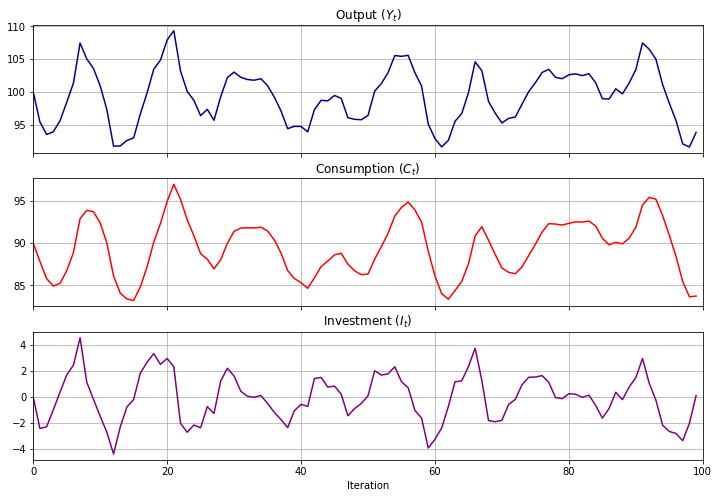

In [25]:
#Illustrations

samlss = SamuelsonLSS()

samlss.plot_simulation(100, stationary=False)
plt.show()



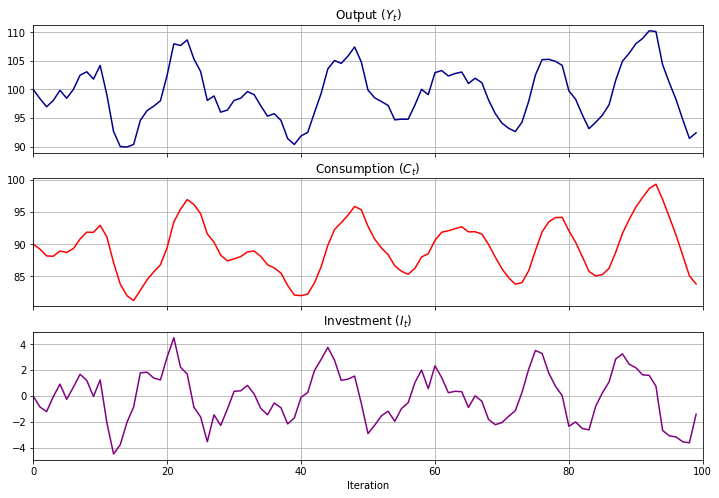

In [26]:
samlss.plot_simulation(100, stationary=True)
plt.show()

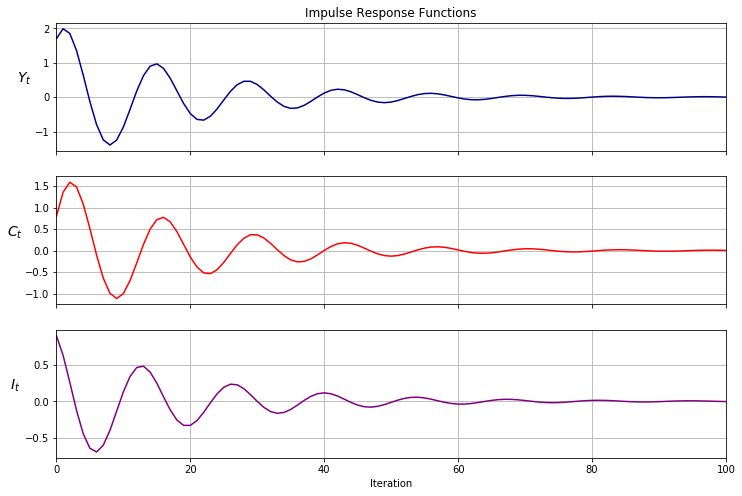

In [27]:
samlss.plot_irf(100)
plt.show()

In [28]:
samlss.multipliers()

array([7.414389, 6.835896, 0.578493])

Stationary distribution does not exist


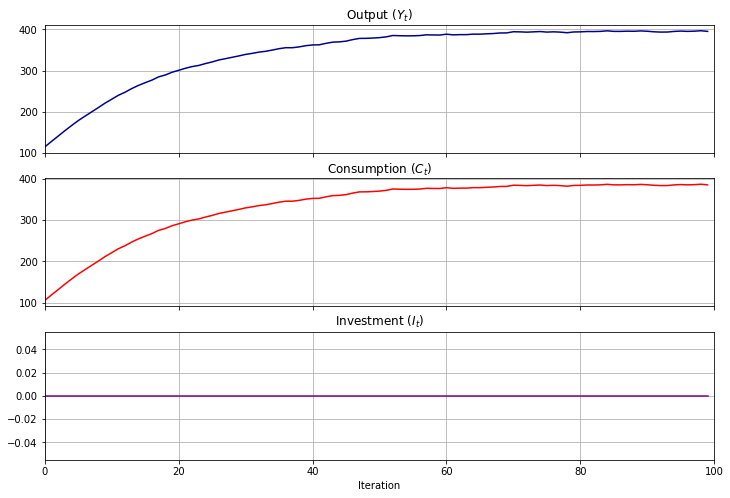

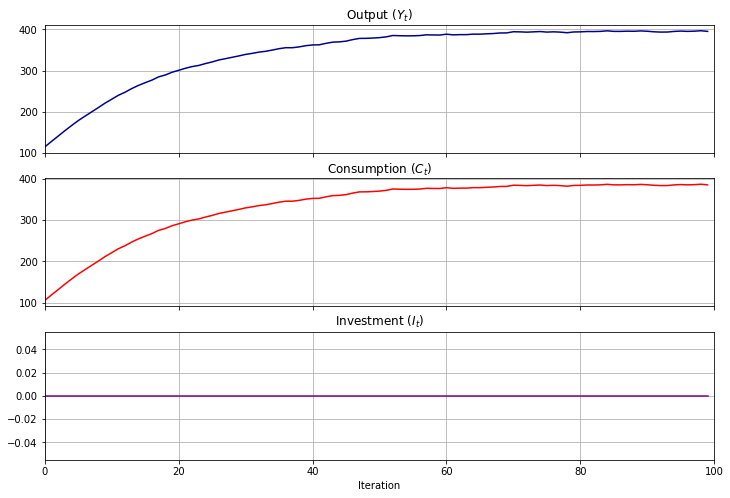

In [29]:
#Pure multiplier model

pure_multiplier = SamuelsonLSS(α=0.95, β=0)

pure_multiplier.plot_simulation()



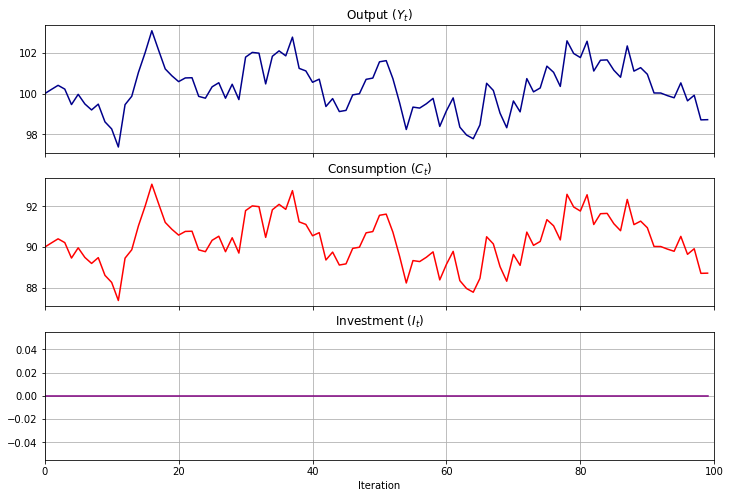

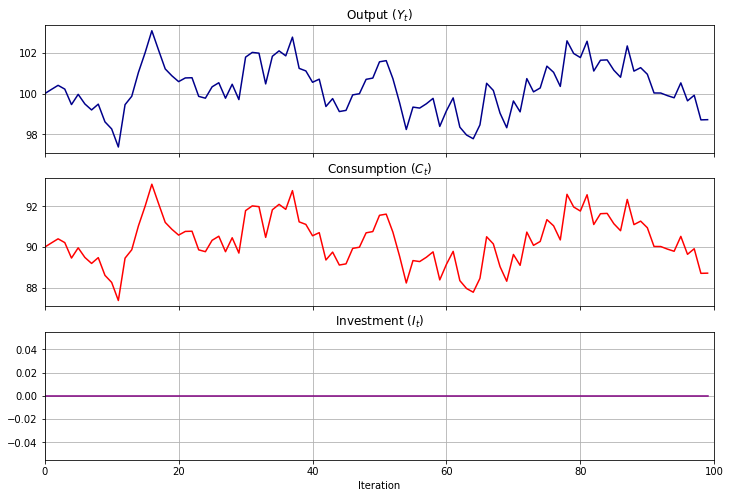

In [30]:
pure_multiplier = SamuelsonLSS(α=0.8, β=0)

pure_multiplier.plot_simulation()



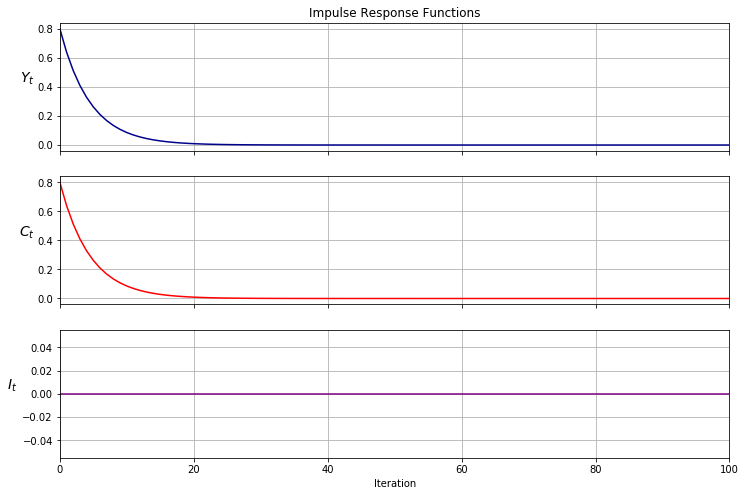

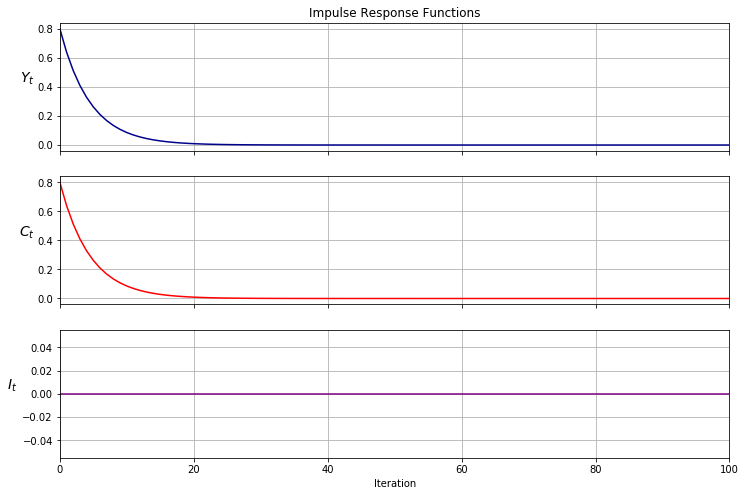

In [31]:
pure_multiplier.plot_irf(100)

### Lesson: More Language Features

In [5]:
#Formally, an iterator is an object with a __next__ method

In [2]:
%%file us_cities.txt
new york: 8244910
los angeles: 3819702
chicago: 2707120
houston: 2145146
philadelphia: 1536471
phoenix: 1469471
san antonio: 1359758
san diego: 1326179
dallas: 1223229

Writing us_cities.txt


In [3]:
f = open('us_cities.txt')
f.__next__()

'new york: 8244910\n'

In [4]:
f.__next__()

'los angeles: 3819702\n'

In [8]:
x = [10, -10]
max(x)

10

In [9]:
y = iter(x)
max(y)

10

In [11]:
#If we want to see the names
dir(math)[0:10]

['__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'acos',
 'acosh',
 'asin',
 'asinh',
 'atan']

In [12]:
print(math.__doc__)

This module is always available.  It provides access to the
mathematical functions defined by the C standard.


In [13]:
math.__name__

'math'

In [14]:
print(__name__)

__main__


To see the contents of the namespace of __main__ we use vars() rather than vars(__main__)

If you prefer to see only the variables you have initialized, use whos

In [15]:
%whos

Variable   Type             Data/Info
-------------------------------------
f          TextIOWrapper    <_io.TextIOWrapper name='<...>de='r' encoding='cp1251'>
math       module           <module 'math' (built-in)>
x          list             n=2
y          list_iterator    <list_iterator object at 0x0000018FC7655518>


In [16]:
#we can view the contents of the local namespace with locals()

def f(x):
    a = 2
    print(locals())
    return a * x

In [17]:
f(1)

{'a': 2, 'x': 1}


2

In [18]:
dir(__builtins__)[0:10]

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError']

In [19]:
%%file test.py
def g(x):
    a = 1
    x = x + a
    return x

a = 0
y = g(10)
print("a = ", a, "y = ", y)

Writing test.py


In [20]:
%run test.py

a =  0 y =  11


In [21]:
def f(x):
    x = x + 1
    return x

x = 1
print(f(x), x)

2 1


In [22]:
def f(x):
    x[0] = x[0] + 1
    return x

x = [1]
print(f(x), x)

[2] [2]


In [23]:
#Assertions

#Example, writing out own variation computation function

def var(y):
    n = len(y)
    assert n > 1, 'Sample size must be greater than one.'
    return np.sum((y - y.mean())**2) / float(n-1)

In [24]:
var([1])

AssertionError: Sample size must be greater than one.

In [25]:
#But the example above terminates the execution. 
#That's why Exceptions are morte widely used. 

def f(x):
    try:
        return 1.0 / x
    except ZeroDivisionError:
        print('Error: division by zero.  Returned None')
    return None

In [26]:
f(0)

Error: division by zero.  Returned None


In [27]:
class Car:

    def __init__(self, miles=1000):
        self._miles = miles
        self._kms = miles * 1.61

    def set_miles(self, value):
        self._miles = value
        self._kms = value * 1.61

    def set_kms(self, value):
        self._kms = value
        self._miles = value / 1.61

    def get_miles(self):
        return self._miles

    def get_kms(self):
        return self._kms

    miles = property(get_miles, set_miles)
    kms = property(get_kms, set_kms)

In [28]:
car = Car()
car.miles

1000

In [29]:
car.miles = 6000
car.kms

9660.0

In [30]:
#Example of porperties ove rdecorators

class Car:

    def __init__(self, miles=1000):
        self._miles = miles
        self._kms = miles * 1.61

    @property
    def miles(self):
        return self._miles

    @property
    def kms(self):
        return self._kms

    @miles.setter
    def miles(self, value):
        self._miles = value
        self._kms = value * 1.61

    @kms.setter
    def kms(self, value):
        self._kms = value
        self._miles = value / 1.61

In [31]:
#Denerators

singular = ('dog', 'cat', 'bird')
plural = (string + 's' for string in singular)
type(plural)

generator

In [32]:
next(plural)

'dogs'

In [33]:
#A generator function

def f():
    yield 'start'
    yield 'middle'
    yield 'end'
    

In [34]:
gen = f()
gen

<generator object f at 0x0000018FC76CBD58>

In [35]:
next(gen)

'start'

In [36]:
next(gen)

'middle'

In [37]:
next(gen)

'end'

In [38]:
next(gen)

StopIteration: 

In [39]:
def g(x):
    while x < 100:
        yield x
        x = x * x

In [40]:
#The loop inside can be infinite
def g(x):
    while 1:
        yield x
        x = x * x

In [41]:
import random
n = 10000000
draws = [random.uniform(0, 1) < 0.5 for i in range(n)]
sum(draws)

5000856

In [42]:
#Same with generator

def f(n):
    i = 1
    while i <= n:
        yield random.uniform(0, 1) < 0.5
        i += 1

In [43]:
n = 10000000
draws = f(n)
sum(draws)

5001161

In [44]:
#Example of a recursive function

def x(t):
    if t == 0:
        return 1
    else:
        return 2 * x(t-1)

#### Exercises


In [53]:
#Ex1

"""
Write a function to recursively compute the t-th Fibonacci number for any t
"""


def fibo(t):
    """
    This function outputs t-th Fibo number for any t and works recursively
    """
    if t == 0:
        return 0
    elif t == 1:
        return 1
    else:
        return fibo(t-1) + fibo(t-2)

In [55]:
fibo(4)

3

In [62]:
#Ex2

#Complete the following code, and test it using given file, which we assume that you’ve put in your current working directory

def column_iterator(target_file, column_number):
    """A generator function for CSV files.
    When called with a file name target_file (string) and column number
    column_number (integer), the generator function returns a generator
    that steps through the elements of column column_number in file
    target_file.
    """
    
    f = open(target_file, 'r')
    for line in f:
        yield line.split(",")[column_number-1]
    f.close()

dates = column_iterator('test_table.csv', 1)

i=1
for date in dates:
    print(date)
    if i == 10:
        break
    i +=1




Date
2009-05-21
2009-05-20
2009-05-19
2009-05-18
2009-05-15
2009-05-14
2009-05-13
2009-05-12
2009-05-11


![Ex3](img/addit_1.png)

In [65]:
%%file numbers.txt
prices
3
8

7
21

Writing numbers.txt


In [76]:
def summing_lines(file):
    """
    a function for computing the sum of numbers in lines of file, 
    ignoring lines without numbers
    """
    f = open(file, "r")
    Sum = 0
    for line in f:
        try:
            num = int(line)
        except:
            #Whoopsie, could't read the line number
            num = 0 
        Sum += num
    return Sum

In [77]:
summing_lines("numbers.txt")

39

### Lesson: Debugging

“Debugging is twice as hard as writing the code in the first place. Therefore, if you write the code as cleverly as possible, you are, by definition, not smart enough to debug it.” – Brian Kernighan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

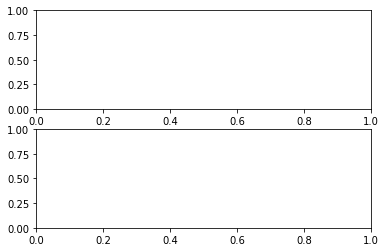

In [2]:
#The debug magic

def plot_log():
    fig, ax = plt.subplots(2, 1)
    x = np.linspace(1, 2, 10)
    ax.plot(x, np.log(x))
    plt.show()

plot_log()  # Call the function, generate plot

In [4]:
%debug

> <ipython-input-2-b4b3002f5d97>(6)plot_log()
      4     fig, ax = plt.subplots(2, 1)
      5     x = np.linspace(1, 2, 10)
----> 6     ax.plot(x, np.log(x))
      7     plt.show()
      8 


Documented commands (type help <topic>):
EOF    cl         disable  interact  next    psource  rv         unt   
a      clear      display  j         p       q        s          until 
alias  commands   down     jump      pdef    quit     source     up    
args   condition  enable   l         pdoc    r        step       w     
b      cont       exit     list      pfile   restart  tbreak     whatis
break  continue   h        ll        pinfo   return   u          where 
bt     d          help     longlist  pinfo2  retval   unalias  
c      debug      ignore   n         pp      run      undisplay

Miscellaneous help topics:
exec  pdb

n(ext)
        Continue execution until the next line in the current function
        is reached or it returns.


In [12]:
#Using a breakpoint

def plot_log():
    breakpoint()
    fig, ax = plt.subplots()
    x = np.logspace(1, 2, 10)
    ax.plot(x, np.log(x))
    plt.show()

plot_log()

NameError: name 'breakpoint' is not defined

In [11]:
%debug

> <ipython-input-5-765de71f7db6>(4)plot_log()
      2 
      3 def plot_log():
----> 4     breakpoint()
      5     fig, ax = plt.subplots()
      6     x = np.logspace(1, 2, 10)

